# Fake News Detector using Machine Learning

This project uses NLP and machine learning to classify news articles as **real** or **fake**.

I experimented with **Logistic Regression** and **Naive Bayes**, and found Naive Bayes to perform better on unseen text. The dataset includes both fake and real news headlines and articles.

---

## Step 1: Import Libraries & Load Data

🔹 First 5 rows of data:
                                               title  \
0  U.S. Senate panel approves controversial EPA n...   
1  Pope urges EU to rediscover unity if it wants ...   
2  After financial pledges, France urges Chad to ...   
3        Tunisian navy rescues 78 migrants off coast   
4  80 YEAR OLD MAN Writes MUST READ Letter To RNC...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The Senate Environment ...  politicsNews   
1  VATICAN CITY (Reuters) - Pope Francis, in a ma...     worldnews   
2  PARIS (Reuters) - France on Monday urged Chadi...     worldnews   
3  TUNIS (Reuters) - Tunisia s navy rescued 78 mi...     worldnews   
4  This letter was sent to 100% FED Up! by an ano...      politics   

                  date  label  
0    October 25, 2017       1  
1    October 28, 2017       1  
2  September 11, 2017       1  
3  September 22, 2017       1  
4         Apr 13, 2016      0  

🔹 Data Info:
<class 'pand

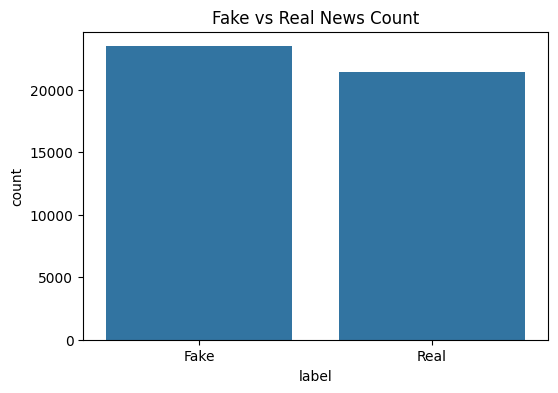

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add labels
fake['label'] = 0
real['label'] = 1

# Combine and shuffle
data = pd.concat([fake, real], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)

# Explore
print("🔹 First 5 rows of data:")
print(data.head())

print("\n🔹 Data Info:")
print(data.info())

print("\n🔹 Missing values per column:")
print(data.isnull().sum())

# Plot distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data)
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title("Fake vs Real News Count")
plt.show()


##  Step 2: Text Cleaning & Preprocessing
We’ll lowercase the text, remove punctuation, digits, and stopwords, and apply stemming.


In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply
data['clean_text'] = data['text'].apply(clean_text)

# Preview
print("🔹 Original Text:\n", data['text'].iloc[0][:300])
print("\n🔹 Cleaned Text:\n", data['clean_text'].iloc[0][:300])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


🔹 Original Text:
 WASHINGTON (Reuters) - The Senate Environment and Public Works Committee on Wednesday approved four nominees to key posts at the Environmental Protection Agency, including one appointee with ties to the chemical industry who will head the agency’s office of chemical safety. Senator Tom Carper, the t

🔹 Cleaned Text:
 washington reuter senat environ public work committe wednesday approv four nomine key post environment protect agenc includ one appointe tie chemic industri head agency’ offic chemic safeti senat tom carper top democrat committe said two nomine “grave concern” bill wehrum nomin assist administr offi


## Step 3: Vectorization using TF-IDF
We’ll convert the cleaned text into numerical form using TF-IDF vectorizer.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_text'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Step 4: Model Training – Naive Bayes (Final Model)

Logistic Regression was also tested, but Naive Bayes gave better results on real-world inputs, so it was used as the final model.


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Evaluate
nb_pred = nb_model.predict(X_test)
print(" Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\n Classification Report:")
print(classification_report(y_test, nb_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))


 Naive Bayes Accuracy: 0.9405345211581292

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4766
           1       0.93      0.94      0.94      4214

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980


 Confusion Matrix:
[[4475  291]
 [ 243 3971]]


## 🔍 Step 5: Make Predictions on New Text
You can now test the model on custom news articles.


In [7]:
def predict_news(text_input):
    cleaned = clean_text(text_input)
    vector = vectorizer.transform([cleaned])
    prediction = nb_model.predict(vector)[0]
    return "📰 Real News" if prediction == 1 else "🚨 Fake News"

# Test example
test_news = """In a press briefing held at the National Press Club, the finance minister
announced a 12% increase in education budget for the fiscal year 2025."""
print("Prediction:", predict_news(test_news))


Prediction: 📰 Real News
